## 選出兩個特徵，並找出其最適合的k值

一共有5個特徵，所以有十種排列方式，
首先先印出兩兩一對的情況下，每對關聯係數的結果。

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('ames.csv')
table = np.array(df.values)
x = []
for i in range(table.shape[1]):
    x.append(table[:,i])
for i in range(table.shape[1]):
    for j in range(i + 1, table.shape[1]):
        print("---", df.columns[i], ",", df.columns[j], "---")
        xi_mean = x[i].mean()
        xj_mean = x[j].mean()
        diff = (x[i] - xi_mean)*(x[j] - xj_mean)
        covar = diff.sum() / table.shape[0]
        print("Covariance:", covar)
        corr = covar / (x[i].std() * x[j].std())
        print("Correlation:", corr, "\n")

--- LotArea , TotalBsmtSF ---
Covariance: 881489.9906278467
Correlation: 0.25376477947383913 

--- LotArea , FirstFlrSF ---
Covariance: 1025627.052118953
Correlation: 0.33223498083235076 

--- LotArea , GrLivArea ---
Covariance: 1137273.0587411618
Correlation: 0.28559921413426115 

--- LotArea , SalePrice ---
Covariance: 167737746.47261286
Correlation: 0.26654922032842965 

--- TotalBsmtSF , FirstFlrSF ---
Covariance: 138275.9502724551
Correlation: 0.8004286876684702 

--- TotalBsmtSF , GrLivArea ---
Covariance: 99186.51906405433
Correlation: 0.44510760027408197 

--- TotalBsmtSF , SalePrice ---
Covariance: 22274790.167238522
Correlation: 0.6325288490320324 

--- FirstFlrSF , GrLivArea ---
Covariance: 111329.47570478398
Correlation: 0.5621658429320106 

--- FirstFlrSF , SalePrice ---
Covariance: 19456087.003702547
Correlation: 0.6216760632702533 

--- GrLivArea , SalePrice ---
Covariance: 28532458.203236148
Correlation: 0.7067799209766279 



從上面顯示的結果會發現，地下室面積大小 TotalBsmtSF 和 一樓面積大小 FirstFlrSF 關聯係數最大，高達0.8，

但因為這點是還蠻合理的，這就好比在問，同個房子的不同樓層之間的關聯係數，  因此關聯係數這麼高並不會讓人感到意外。

所以我選擇要對關聯係數次高的車庫面積 GrLivArea 和銷售價格 SalePrice 進行kmeans分群

## SalePrice & GrLivArea
選擇對車庫面積 GrLivArea 和銷售價格 SalePrice 進行kmeans分群進行kmeans分群，  
並顯示從分成 2 類到分成 8 類的分群情況

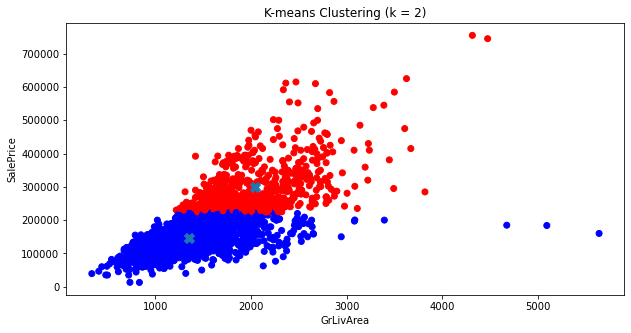

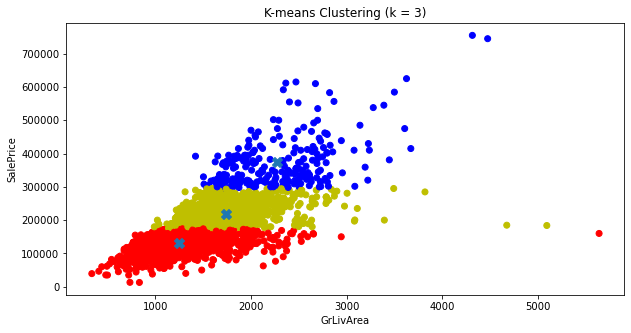

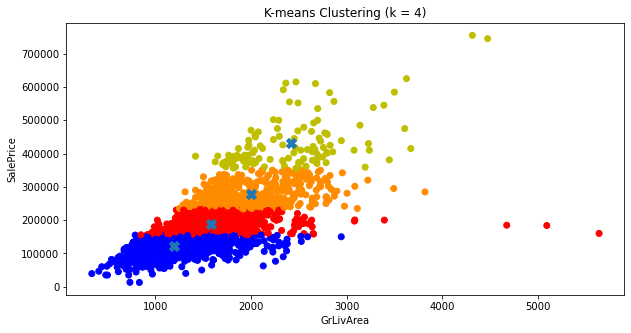

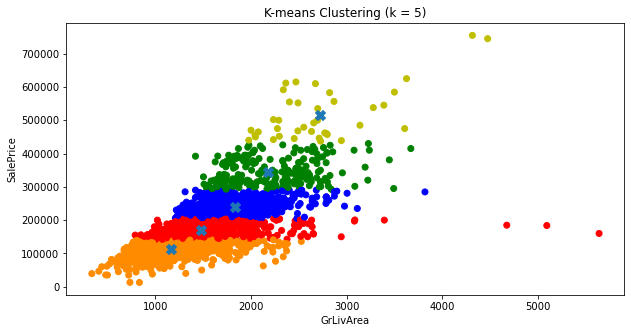

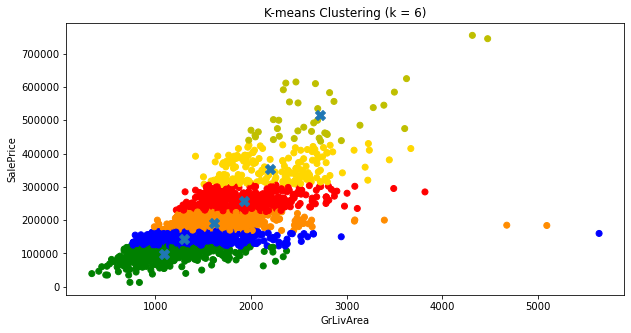

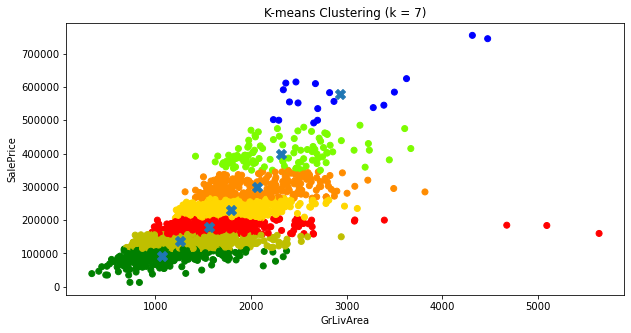

In [30]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import cluster
import matplotlib.pyplot as plt
i = 3
j = 4
a = []
for k in range(len(x[i])):
    a.append([x[i][k], x[j][k]])
X = pd.DataFrame(a, columns=[str(df.columns[i]), str(df.columns[j])])

for k in range(2, 8):
    kmeans = cluster.KMeans(n_clusters=k, random_state=12)
    kmeans.fit(X)
    colmap = np.array(["r", "b", "y", "darkorange", "g", "gold", "lawngreen", "lightseagreen"])
    plt.figure(figsize=(10,5))

    plt.scatter(X[str(df.columns[i])], X[str(df.columns[j])], 
            color=colmap[kmeans.labels_])

    plt.xlabel(str(df.columns[i]))
    plt.ylabel(str(df.columns[j]))
    plt.title("K-means Clustering (k = {})".format(k))

    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='X', s=100)

    plt.show()

觀察上列分布情況後，我會選擇將 k 設定為分成四群較符合實用需求，在該分群下，  
可以發現會被分成四類，整體的分類會根據垂直方向分成四類，但每個群又有其特別之處，  
#### k = 4 分群:
- 第一類藍色，屬於值很集中分布，沒有特別的離群值
- 第二類紅色，屬於大多數值集中分布，但在水平方向擁有最極端的三點的離群值
- 第三類橘色，屬於值大多數值集中分布，水平方向稍微有幾個點跑掉，但整體仍然相對集中
- 第四類綠色，屬於值稍微分散，不論是在垂直方向還是水平方向都有幾點特別的離群值

而其他的分群都不是分得過細，就是分的還不夠多，因此我選擇 k = 4 的情況

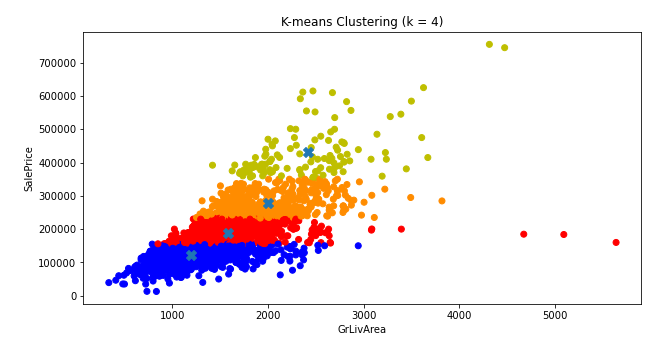